<a href="https://colab.research.google.com/github/rangkuti289/Portof/blob/master/Komparasi%20KNN%20dan%20Naive%20Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
test_ta = pd.read_excel("drive/MyDrive/TA.xlsx")

In [ ]:
# input data yang di inginkan
# from google.colab import files
# uploaded = files.upload()

In [ ]:
#untuk mendeklarasikan datatb
#import io
#test_ta = pd.read_excel(io.BytesIO(uploaded['data_test.xlsx']))
#test_ta [0:5]

In [ ]:
test_ta.axes

[RangeIndex(start=0, stop=250000, step=1),
 Index(['NMPROP', 'NMKAB', 'Jumlah_ART', 'Jumlah_Keluarga', 'status_bangunan',
        'status_lahan', 'ada_tabung_gas', 'ada_lemari_es', 'ada_ac',
        'ada_pemanas', 'ada_telepon', 'ada_tv', 'ada_emas', 'ada_laptop',
        'ada_sepeda', 'ada_motor', 'ada_mobil', 'ada_perahu',
        'ada_motor_tempel', 'ada_perahu_motor', 'ada_kapal',
        'aset_tak_bergerak', 'luas_atb', 'rumah_lain', 'jumlah_sapi',
        'jumlah_kerbau', 'jumlah_kuda', 'jumlah_babi', 'jumlah_kambing',
        'sta_art_usaha', 'JnsKelamin', 'TmpLahir', 'TglLahir', 'Hub_KRT', 'NUK',
        'Hubkel', 'Umur', 'kepemilikan_kartu', 'jenis_disabilitas',
        'Partisipasi_sekolah', 'Pendidikan_tertinggi', 'Sta_Bekerja',
        'Lapangan_usaha', 'Status_pekerjaan', 'lapangan_usahaart',
        'lokasi_usaha', 'omset_usaha', 'ada_PKH', 'ada_KKS', 'ada_kip'],
       dtype='object')]

In [ ]:
test_ta [0:5]

,NMPROP,NMKAB,Jumlah_ART,Jumlah_Keluarga,status_bangunan,status_lahan,ada_tabung_gas,ada_lemari_es,ada_ac,ada_pemanas,...,Pendidikan_tertinggi,Sta_Bekerja,Lapangan_usaha,Status_pekerjaan,lapangan_usahaart,lokasi_usaha,omset_usaha,ada_PKH,ada_KKS,ada_kip
0,DKI JAKARTA,KEPULAUAN SERIBU,3,1.0,Milik sendiri,Milik sendiri,TIDAK,YA,TIDAK,TIDAK,...,SD/SLB,YA,Bangunan/konstruksi,Pekerja bebas non-pertanian,NaN,NaN,NaN,0,0,0
1,DKI JAKARTA,KEPULAUAN SERIBU,3,1.0,Milik sendiri,Milik sendiri,TIDAK,YA,TIDAK,TIDAK,...,SMP/SMPLB,YA,"Jasa kemasyarakatan, pemerintahan & perorangan",Pekerja bebas non-pertanian,NaN,NaN,NaN,0,0,0
2,DKI JAKARTA,KEPULAUAN SERIBU,2,1.0,Milik sendiri,Milik sendiri,TIDAK,TIDAK,TIDAK,TIDAK,...,SD/SLB,YA,Perikanan tangkap,Berusaha sendiri,NaN,NaN,NaN,1,0,0
3,DKI JAKARTA,KEPULAUAN SERIBU,3,1.0,Milik sendiri,Milik sendiri,TIDAK,YA,TIDAK,TIDAK,...,M. Tsanawiyah,TIDAK,NaN,NaN,NaN,NaN,NaN,0,0,0
4,DKI JAKARTA,KEPULAUAN SERIBU,,1.0,Milik sendiri,Milik sendiri,TIDAK,TIDAK,TIDAK,TIDAK,...,NaN,TIDAK,NaN,NaN,NaN,NaN,NaN,1,0,0


In [ ]:
#Menghapus Kolom yang tidak digunakan
data = test_ta.drop(['status_bangunan','status_lahan','ada_tabung_gas','ada_lemari_es','ada_ac','ada_pemanas','ada_telepon','ada_tv','ada_emas','ada_laptop','ada_sepeda','ada_motor','ada_mobil','ada_perahu','ada_motor_tempel','ada_perahu_motor','ada_kapal','aset_tak_bergerak','luas_atb','rumah_lain','jumlah_sapi','jumlah_kerbau','jumlah_kuda','jumlah_babi','jumlah_kambing','sta_art_usaha','JnsKelamin','TmpLahir','TglLahir','Hub_KRT','NUK', 'lapangan_usahaart','omset_usaha','lokasi_usaha','Lapangan_usaha','kepemilikan_kartu','Status_pekerjaan','NMPROP','NMKAB','Hubkel'], axis = 1)

In [ ]:
data [0:5]

,Jumlah_ART,Jumlah_Keluarga,Umur,jenis_disabilitas,Partisipasi_sekolah,Pendidikan_tertinggi,Sta_Bekerja,ada_PKH,ada_KKS,ada_kip
0,3,1.0,49.0,Tidak cacat,Tidak bersekolah lagi,SD/SLB,YA,0,0,0
1,3,1.0,45.0,Tidak cacat,Tidak bersekolah lagi,SMP/SMPLB,YA,0,0,0
2,2,1.0,50.0,Tidak cacat,Tidak bersekolah lagi,SD/SLB,YA,1,0,0
3,3,1.0,12.0,Tidak cacat,Masih sekolah,M. Tsanawiyah,TIDAK,0,0,0
4,,1.0,50.0,Tidak cacat,Tidak/belum pernah sekolah,NaN,TIDAK,1,0,0


In [ ]:
data.shape

(250000, 10)

In [ ]:
data.isnull().sum()

Jumlah_ART                  0
Jumlah_Keluarga             9
Umur                       47
jenis_disabilitas        8212
Partisipasi_sekolah     18025
Pendidikan_tertinggi    31987
Sta_Bekerja             18528
ada_PKH                     0
ada_KKS                     0
ada_kip                     0
dtype: int64

In [ ]:
#Menghapus baris data yang kosong
data.dropna(inplace=True)
data.isnull().sum()

Jumlah_ART              0
Jumlah_Keluarga         0
Umur                    0
jenis_disabilitas       0
Partisipasi_sekolah     0
Pendidikan_tertinggi    0
Sta_Bekerja             0
ada_PKH                 0
ada_KKS                 0
ada_kip                 0
dtype: int64

In [ ]:
data.shape

(218009, 10)

In [ ]:
#menentukan variabel independen mempengaruhi
data1 = data[['Jumlah_ART', 'Jumlah_Keluarga', 'Umur', 'jenis_disabilitas','Partisipasi_sekolah','Pendidikan_tertinggi','Sta_Bekerja','ada_PKH','ada_KKS']]

In [ ]:
data1.head()

,Jumlah_ART,Jumlah_Keluarga,Umur,jenis_disabilitas,Partisipasi_sekolah,Pendidikan_tertinggi,Sta_Bekerja,ada_PKH,ada_KKS
0,3,1.0,49.0,Tidak cacat,Tidak bersekolah lagi,SD/SLB,YA,0,0
1,3,1.0,45.0,Tidak cacat,Tidak bersekolah lagi,SMP/SMPLB,YA,0,0
2,2,1.0,50.0,Tidak cacat,Tidak bersekolah lagi,SD/SLB,YA,1,0
3,3,1.0,12.0,Tidak cacat,Masih sekolah,M. Tsanawiyah,TIDAK,0,0
5,1,1.0,52.0,Tidak cacat,Tidak bersekolah lagi,SD/SLB,YA,0,0


In [ ]:
import numpy as np
data1.describe() # Untuk fitur numerik (atau continous)
data1.describe(exclude = np.number) # Untuk fitur kategorik

,Jumlah_ART,jenis_disabilitas,Partisipasi_sekolah,Pendidikan_tertinggi,Sta_Bekerja
count,218009,218009,218009,218009,218009
unique,20,13,2,10,2
top,4,Tidak cacat,Tidak bersekolah lagi,SD/SLB,TIDAK
freq,60836,215898,163072,82900,132976


In [ ]:
#Membuat Labelling
label = {
    'Tidak/belum pernah sekolah':1,
    'Tidak bersekolah lagi':2,
    'Masih sekolah':3
}

data1['Partisipasi_sekolah'].replace(label, inplace=True)

<ipython-input-17-325ee82df6e1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Partisipasi_sekolah'].replace(label, inplace=True)


In [ ]:
#Cek Unique Values
data["Sta_Bekerja"].unique()

array(['YA', 'TIDAK'], dtype=object)

In [ ]:
#Membuat Labeling
label = {
    'YA':1,
    'TIDAK':0
}
data1['Sta_Bekerja'].replace(label, inplace =True)

<ipython-input-19-6316e2b420a4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Sta_Bekerja'].replace(label, inplace =True)


In [ ]:
#Membuat Labelling
label = {
    'Tidak cacat':0, 
    'Tuna netra & cacat tubuh':1, 
    'Tuna rungu':1,
       'Tuna rungu, wicara, netra & cacat tubuh':1,
        'Cacat fisik & mental':1,
       'Tuna daksa/cacat tubuh':1,
        'Tuna rungu, wicara & cacat tubuh':1,
       'Cacat mental retardasi':1,
        'Tuna netra/buta':1,
       'Mantan penderita gangguan jiwa':0,
        'Tuna wicara':1,
       'Tuna rungu & wicara':1,
        'Tuna netra, rungu & wicara':1
}

data1['jenis_disabilitas'].replace(label, inplace=True)

<ipython-input-20-e7a0a4144a08>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['jenis_disabilitas'].replace(label, inplace=True)


In [ ]:
#Membuat Labelling
label = {
    'SD/SLB':1,
    'Paket A':1,
    'M. Ibtidaiyah':1,
    'SMP/SMPLB':2,
    'Paket B':2,
    'M. Tsanawiyah':2,
    'M. Aliyah':3,
    'SMA/SMK/SMALB':3,
    'Paket C':3,
    'Perguruan Tinggi':4

}

data1['Pendidikan_tertinggi'].replace(label, inplace=True)

<ipython-input-21-a2cd12e2cc38>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Pendidikan_tertinggi'].replace(label, inplace=True)


In [ ]:
# #Mengubah set data diskrit menjadi dummy
# data1 = pd.get_dummies(data)

In [ ]:
data1 [0:5]

,Jumlah_ART,Jumlah_Keluarga,Umur,jenis_disabilitas,Partisipasi_sekolah,Pendidikan_tertinggi,Sta_Bekerja,ada_PKH,ada_KKS
0,3,1.0,49.0,0,2,1,1,0,0
1,3,1.0,45.0,0,2,2,1,0,0
2,2,1.0,50.0,0,2,1,1,1,0
3,3,1.0,12.0,0,3,2,0,0,0
5,1,1.0,52.0,0,2,1,1,0,0


In [ ]:
#variabel Dependen
y = data['ada_kip']
y [0:5]

0    0
1    0
2    0
3    0
5    0
Name: ada_kip, dtype: int64

In [ ]:
# data1.astype(int) [0:5]

In [ ]:
from sklearn.model_selection import train_test_split
data1_train, data1_test, y_train, y_test = train_test_split( data1, y, test_size=0.2, random_state=42)
print ('Train set:', data1_train.shape,  y_train.shape)
print ('Test set:', data1_test.shape,  y_test.shape)

Train set: (174407, 9) (174407,)
Test set: (43602, 9) (43602,)


In [ ]:
#mengubah skala data menggunakan featuring scalling agar data seragam menggunakan sandar scaller
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data1_train)

data1_train = scaler.transform(data1_train)
data1_test = scaler.transform(data1_test)

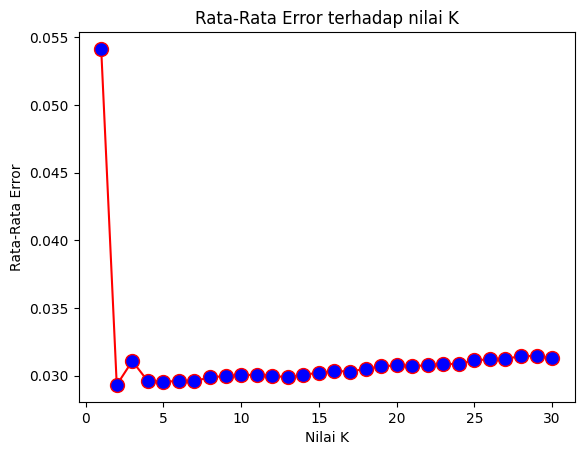

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

error = []

for i in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(data1_train, y_train)

    pred_i = knn.predict(data1_test)
    error.append(np.mean(pred_i != y_test))

plt.figure()
plt.plot(range(1, 31), error, color='red', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Rata-Rata Error terhadap nilai K')
plt.xlabel('Nilai K')
plt.ylabel('Rata-Rata Error')
plt.show()  

In [ ]:
#Mengklasifikasikan dan mengimport KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(data1_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
#prediksi
yhat = knn.predict(data1_test)
yhat [0:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0])

In [ ]:
#menghitung tingkat akurasi data prediksi
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn.predict(data1_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9705401732728618
Test set Accuracy:  0.9689234438787212


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     34697
           1       0.99      0.86      0.92      8905

    accuracy                           0.97     43602
   macro avg       0.98      0.93      0.95     43602
weighted avg       0.97      0.97      0.97     43602



Validasi

In [ ]:
#Cross Validation
from sklearn.model_selection import cross_val_score
import numpy as np
# use the same model as before
knn = KNeighborsClassifier(n_neighbors = 3)
scores = cross_val_score(knn, data1, y, cv=10, scoring='accuracy')
# print all 5 times scores 
print(scores)
# then I will do the average about these five scores to get more accuracy score.
print(scores.mean())

[0.9950461  0.9945874  0.99380762 0.87418008 0.84175038 0.99642218
 0.99619284 0.99527545 0.99578001 0.9953211 ]
0.9678363163208152


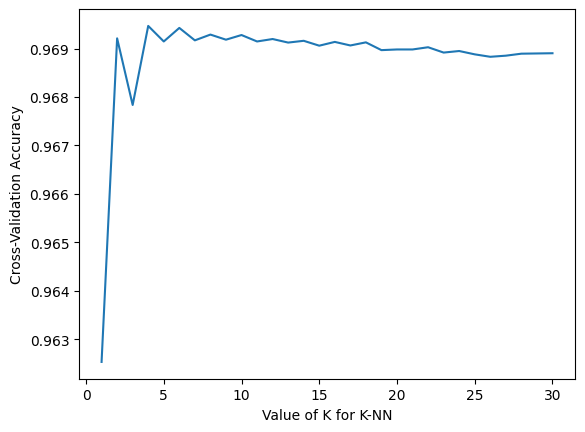

[0.9625292001166514, 0.9692124086135262, 0.9678363163208152, 0.9694692777749021, 0.9691481894820919, 0.9694279944232841, 0.9691711233682152, 0.9692903843734128, 0.9691848842048743, 0.9692812111135378, 0.9691481884300401, 0.9691986452519432, 0.9691252530710444, 0.9691619490562886, 0.9690610352020718, 0.9691390147493445, 0.9690656244621385, 0.969129840437418, 0.9689692981847056, 0.968983059231775, 0.968983059231775, 0.9690289288977147, 0.9689188417836233, 0.9689509504024938, 0.9688821453775581, 0.9688316893972964, 0.9688546243354714, 0.9688959064246274, 0.9689004935805908, 0.9689050805261438]


In [ ]:
#Tunning Hyperparameter
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 31
k_range = range(1, 31)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, data1, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for K-NN')
plt.ylabel('Cross-Validation Accuracy')
plt.show()
print(k_scores)

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import PowerTransformer
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=modelnb, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(data1_test)

gs_NB.fit(Data_transformed, y_test);

NameError: ignored

In [ ]:
gs_NB.best_params_

In [ ]:
gs_NB.best_score_

In [ ]:
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']
plt.plot(results_NB['var_smoothing'], results_NB['test_score'], marker = '.')    
plt.xlabel('Var. Smoothing')
plt.ylabel("Mean CV Score")
plt.title("NB Performance Comparison")
plt.show()

In [ ]:
# predict the target on the test dataset
predict_test = gs_NB.predict(Data_transformed)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

**EVALUASI**

In [ ]:
print(confusion_matrix(y_test, yhat))
cm = confusion_matrix(y_test, yhat)
cm_display = ConfusionMatrixDisplay(cm).plot()
print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

**Naive Bayes**

In [ ]:
#untuk mengaktifkn klasifikasi naive bayes
from sklearn.naive_bayes import GaussianNB
modelnb = GaussianNB()
#memasukkan data training pada fungsi klasifikasi Naive Bayes.
nbtrain = modelnb.fit(data1_train, y_train)
nbtrain.class_count_

In [ ]:
# menentukan hasil prediksi data testing, dapat menggunakan script
y_pred  = nbtrain.predict(data1_test)
y_pred [0:50]

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

In [ ]:
#nilai akurasi
from sklearn.metrics import classification_report 
print (classification_report(y_test, y_pred))

**Validasi**

In [ ]:
#Cross Validation
from sklearn.model_selection import cross_val_score
import numpy as np
# use the same model as before
modelnb = GaussianNB()
scores = cross_val_score(modelnb, data1_train, y_train, cv=10, scoring='accuracy')
# print all 5 times scores 
print(scores)
# then I will do the average about these five scores to get more accuracy score.
print(scores.mean())

Evaluasi

In [ ]:
#membuat confussion matriks
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
print(confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()
print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])